In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import sklearn
import os
import re 

In [3]:
df = pd.read_csv("Dataset\energy_dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\4154447365.py:1: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_csv("Dataset\energy_dataset.csv")


,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583


In [4]:
df.columns

Index(['Type_of_Renewable_Energy', 'Installed_Capacity_MW',
       'Energy_Production_MWh', 'Energy_Consumption_MWh',
       'Energy_Storage_Capacity_MWh', 'Storage_Efficiency_Percentage',
       'Grid_Integration_Level', 'Initial_Investment_USD', 'Funding_Sources',
       'Financial_Incentives_USD', 'GHG_Emission_Reduction_tCO2e',
       'Air_Pollution_Reduction_Index', 'Jobs_Created'],
      dtype='object')

In [5]:
df.dtypes

Type_of_Renewable_Energy           int64
Installed_Capacity_MW            float64
Energy_Production_MWh            float64
Energy_Consumption_MWh           float64
Energy_Storage_Capacity_MWh      float64
Storage_Efficiency_Percentage    float64
Grid_Integration_Level             int64
Initial_Investment_USD           float64
Funding_Sources                    int64
Financial_Incentives_USD         float64
GHG_Emission_Reduction_tCO2e     float64
Air_Pollution_Reduction_Index    float64
Jobs_Created                       int64
dtype: object

# Pengertian dari Kolom yang Akan diteliti:
1. Type_of_Renewable_Energy	Numerical code representing the type of renewable energy source (1: Solar, 2: Wind, 3: Hydroelectric, 4: Geothermal, 5: Biomass, 6: Tidal, 7: Wave).
2. Installed_Capacity_MW	Installed capacity in megawatts (MW).
3. Energy_Production_MWh	Yearly energy production in megawatt-hours (MWh).
4. Energy_Consumption_MWh	Yearly energy consumption in megawatt-hours (MWh).
5. Energy_Storage_Capacity_MWh	Energy storage capacity in megawatt-hours (MWh).
6. Storage_Efficiency_Percentage	Efficiency of energy storage systems in percentage.
7. Grid_Integration_Level	Numerical code representing the level of grid integration (1: Fully Integrated, 2: Partially Integrated, 3: Minimal Integration, 4: Isolated Microgrid).
8. Initial_Investment_USD	Initial investment costs in USD.
9. Funding_Sources	Numerical code representing the funding source (1: Government, 2: Private, 3: Public-Private Partnership).
10. Financial_Incentives_USD	Financial incentives in USD.
11. GHG_Emission_Reduction_tCO2e	Reduction in greenhouse gas emissions in tons of CO2 equivalent (tCO2e).
12. Air_Pollution_Reduction_Index	Air pollution reduction index.
13. Jobs_Created	Number of jobs created.


In [6]:
# Merubah nama kolom

df.columns = [
    'Jenis_Energi_Terbarukan',
    'Kapasitas_Energi',
    'Produksi_Energi',
    'Konsumsi_Energi',
    'Kapasitas_Penyimpanan_Energi',
    'Persentase_Efisiensi_Penyimpanan_Energi',
    'Tingkat_Integrasi_Jaringan',
    'Jumlah_Investasi_Awal_USD',
    'Sumber_Pendanaan',
    'Insentif_Keuangan',
    'Pengurangan_Emisi_Gas_Rumah_Kaca',
    'Indeks_Pengurangan_Polusi_Udara',
    'Jumlah_Pekerjaan_yang_Diciptakan']
df

,Jenis_Energi_Terbarukan,Kapasitas_Energi,Produksi_Energi,Konsumsi_Energi,Kapasitas_Penyimpanan_Energi,Persentase_Efisiensi_Penyimpanan_Energi,Tingkat_Integrasi_Jaringan,Jumlah_Investasi_Awal_USD,Sumber_Pendanaan,Insentif_Keuangan,Pengurangan_Emisi_Gas_Rumah_Kaca,Indeks_Pengurangan_Polusi_Udara,Jumlah_Pekerjaan_yang_Diciptakan
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3,745.032555,280007.5738,230544.8268,4351.687893,90.791405,4,3.484136e+08,2,1.558508e+07,25234.911810,78.923200,1452
14996,1,15.187023,377340.5803,358547.3589,6792.194696,78.252040,4,2.560179e+08,3,6.866618e+06,15762.519790,54.982974,2598
14997,3,877.539059,480497.3920,214441.6719,4588.725297,58.282928,1,1.300112e+08,2,3.837764e+06,44597.809410,43.915897,2713
14998,7,551.264716,436383.1694,137043.8713,7251.144215,73.573666,2,3.334831e+08,2,5.347706e+06,34363.858000,4.877145,2128


In [7]:
df.Jenis_Energi_Terbarukan.dtypes

dtype('int64')

In [8]:
numerikal = df.describe()
numerikal

,Jenis_Energi_Terbarukan,Kapasitas_Energi,Produksi_Energi,Konsumsi_Energi,Kapasitas_Penyimpanan_Energi,Persentase_Efisiensi_Penyimpanan_Energi,Tingkat_Integrasi_Jaringan,Jumlah_Investasi_Awal_USD,Sumber_Pendanaan,Insentif_Keuangan,Pengurangan_Emisi_Gas_Rumah_Kaca,Indeks_Pengurangan_Polusi_Udara,Jumlah_Pekerjaan_yang_Diciptakan
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,3.973933,495.855747,252350.955621,225981.854966,5030.196472,75.219334,2.501267,2.514849e+08,2.004000,1.002977e+07,25234.722158,50.724179,2502.668600
std,1.999380,288.212872,144062.915425,129223.677997,2894.096326,14.485289,1.123306,1.432843e+08,0.817493,5.787303e+06,14378.915277,28.556578,1451.212661
min,1.000000,1.091767,1030.103692,584.048006,2.200208,50.003494,1.000000,1.008107e+06,1.000000,5.155842e+04,100.974460,1.009712,10.000000
25%,2.000000,245.475737,128568.875900,115587.428225,2543.341380,62.694076,1.000000,1.259709e+08,1.000000,4.963454e+06,12754.476927,26.224426,1228.000000
50%,4.000000,492.907555,253216.871250,225226.374350,5054.036248,75.279702,3.000000,2.539910e+08,2.000000,1.002414e+07,25424.477000,50.250207,2496.000000
75%,6.000000,742.254682,377083.805575,338656.214700,7536.935405,87.754318,4.000000,3.759130e+08,3.000000,1.507417e+07,37750.426285,75.720133,3765.000000
max,7.000000,999.982979,499991.200400,449922.667800,9999.145037,99.994955,4.000000,4.999407e+08,3.000000,1.999855e+07,49997.578530,99.980494,4999.000000


In [9]:
# mencari nilai kategori Jenis Energi Terbarukan
# (1: Solar, 2: Wind, 3: Hydroelectric, 4: Geothermal, 5: Biomass, 6: Tidal, 7: Wave).

jenis_energi = df.Jenis_Energi_Terbarukan.value_counts()
integrasi_grid = df.Tingkat_Integrasi_Jaringan.value_counts()
sumber_pendanaan = df.Sumber_Pendanaan.value_counts()

In [10]:
# Mencari tingkat data kategorikal
# jenis_energi
jenis_energi.shape

(7,)

In [11]:
jenis_energi

Jenis_Energi_Terbarukan
2    2202
1    2169
3    2157
5    2150
6    2124
4    2105
7    2093
Name: count, dtype: int64

In [12]:
data_counts = df['Jenis_Energi_Terbarukan'].value_counts().reset_index()
data_counts

,Jenis_Energi_Terbarukan,count
0,2,2202
1,1,2169
2,3,2157
3,5,2150
4,6,2124
5,4,2105
6,7,2093


In [13]:
data_counts.columns = ['Jenis_Energi_Terbarukan', 'count']
data_counts

,Jenis_Energi_Terbarukan,count
0,2,2202
1,1,2169
2,3,2157
3,5,2150
4,6,2124
5,4,2105
6,7,2093


In [14]:
category_mapping = {
    1: 'Tenaga Surya',
    2: 'Angin',
    3: 'Hidroelektris',
    4: 'Panas Bumi',
    5: 'Biomasa',
    6: 'Pasang Surut',
    7: 'Ombak',
}

In [15]:
#  Ganti angka menjadi nama kategori di kolom 'Jenis_Energi_Terbarukan'
temp = []
temp = data_counts['Jenis_Energi_Terbarukan'].map(category_mapping)
temp

0            Angin
1     Tenaga Surya
2    Hidroelektris
3          Biomasa
4     Pasang Surut
5       Panas Bumi
6            Ombak
Name: Jenis_Energi_Terbarukan, dtype: object

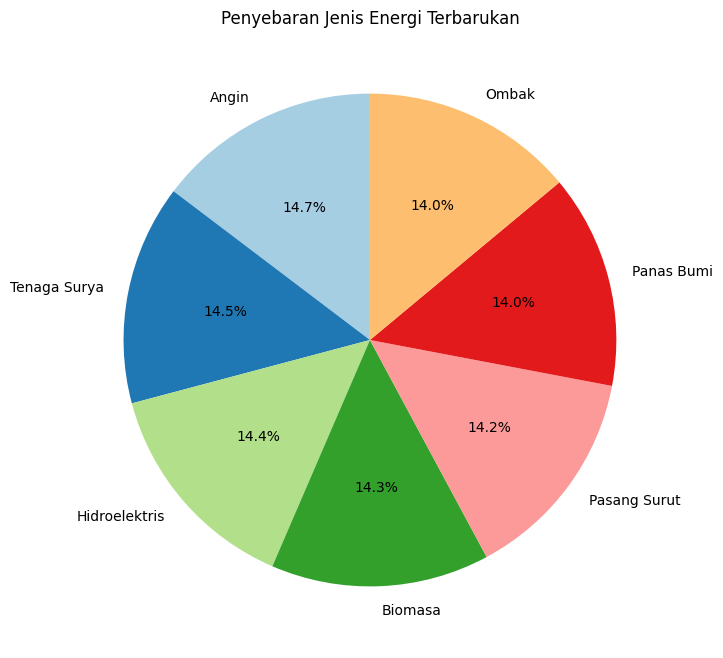

In [16]:
# Membuat Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(data_counts['count'], labels=temp, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Penyebaran Jenis Energi Terbarukan')
plt.show()

In [17]:
integrasi_grid

Tingkat_Integrasi_Jaringan
1    3802
4    3786
3    3749
2    3663
Name: count, dtype: int64

In [18]:
sumber_pendanaan

Sumber_Pendanaan
3    5042
1    4982
2    4976
Name: count, dtype: int64

In [19]:
# Mencari nilai yang kosong
missing_values = df.isnull().sum()
print(missing_values)


Jenis_Energi_Terbarukan                    0
Kapasitas_Energi                           0
Produksi_Energi                            0
Konsumsi_Energi                            0
Kapasitas_Penyimpanan_Energi               0
Persentase_Efisiensi_Penyimpanan_Energi    0
Tingkat_Integrasi_Jaringan                 0
Jumlah_Investasi_Awal_USD                  0
Sumber_Pendanaan                           0
Insentif_Keuangan                          0
Pengurangan_Emisi_Gas_Rumah_Kaca           0
Indeks_Pengurangan_Polusi_Udara            0
Jumlah_Pekerjaan_yang_Diciptakan           0
dtype: int64


In [20]:
# menyetel nilai whitegrid
sns.set(style="whitegrid")

## Kapasitas Energi berdasarkan perbedaan Jenis Energi Terbarukan

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\3220884324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Jenis_Energi_Terbarukan, y=df.Kapasitas_Energi, data=df, palette='viridis')


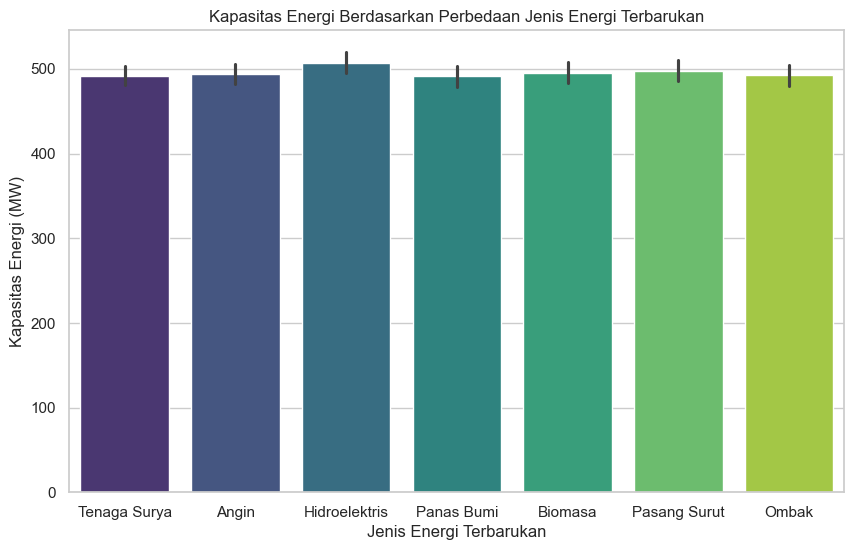

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.Jenis_Energi_Terbarukan, y=df.Kapasitas_Energi, data=df, palette='viridis')
plt.title('Kapasitas Energi Berdasarkan Perbedaan Jenis Energi Terbarukan')
plt.xlabel('Jenis Energi Terbarukan')
plt.ylabel('Kapasitas Energi (MW)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])
plt.show()


The installed capacity for different types of renewable energy sources (Solar, Wind, Hydroelectric, Geothermal, Biomass, Tidal, Wave) appears to be relatively similar, with each type having an installed capacity around 500 MW. There is no single dominant energy source in terms of installed capacity.

## Energy Production vs. Consumption

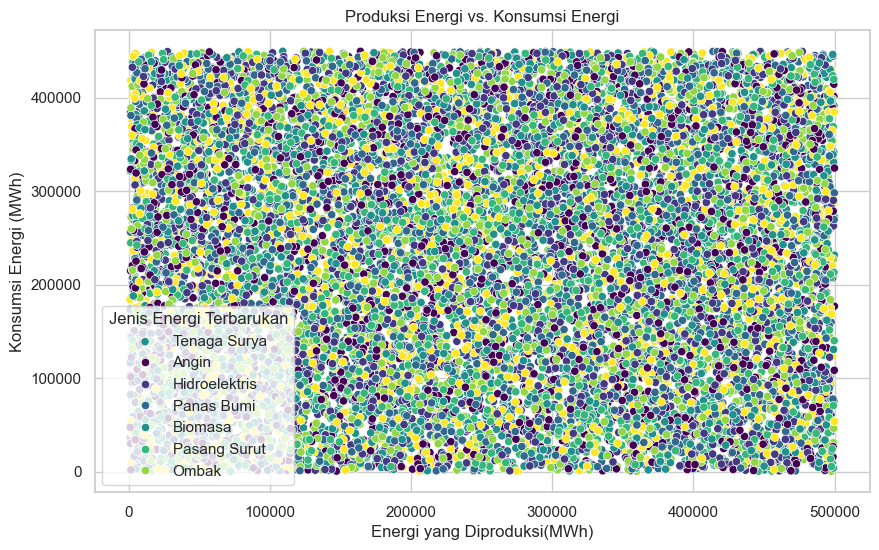

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Produksi_Energi', y='Konsumsi_Energi', hue='Jenis_Energi_Terbarukan', palette='viridis', data=df)
plt.title('Produksi Energi vs. Konsumsi Energi')
plt.xlabel('Energi yang Diproduksi(MWh)')
plt.ylabel('Konsumsi Energi (MWh)')
plt.legend(title='Jenis Energi Terbarukan', labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])
plt.show()


The scatter plot shows a very dense and widespread distribution of points. This indicates a significant variation in energy production and consumption values among the different renewable energy sources. There is no clear trend or linear relationship between energy production and consumption for the different types of renewable energy, suggesting that production and consumption are not directly correlated in this dataset.

## Storage Efficiency of Different Types of Renewable Energy

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\3418793027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Jenis_Energi_Terbarukan', y='Persentase_Efisiensi_Penyimpanan_Energi', data=df, palette='viridis')


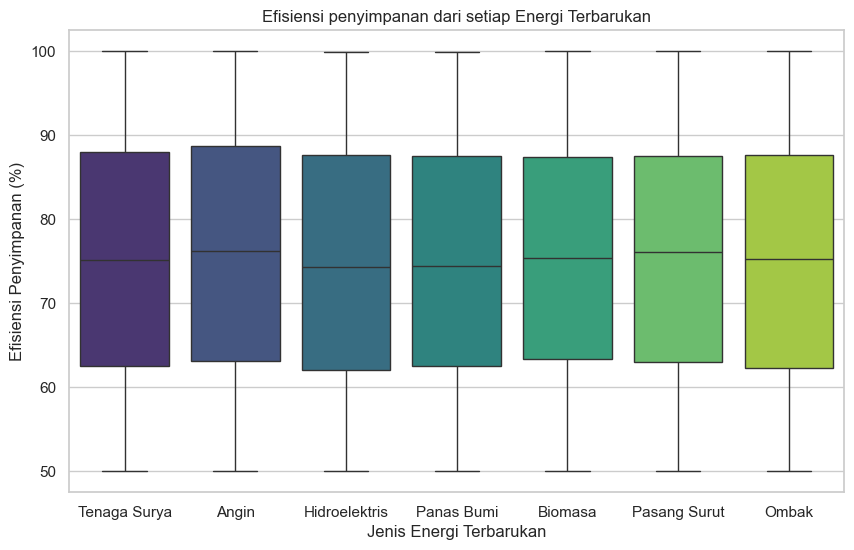

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Jenis_Energi_Terbarukan', y='Persentase_Efisiensi_Penyimpanan_Energi', data=df, palette='viridis')
plt.title('Efisiensi penyimpanan dari setiap Energi Terbarukan')
plt.xlabel('Jenis Energi Terbarukan')
plt.ylabel('Efisiensi Penyimpanan (%)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])
plt.show()


The box plot reveals that storage efficiency percentages for different types of renewable energy are relatively consistent, mostly falling between 60% and 90%. Solar energy has a slightly lower median storage efficiency compared to the others, while Tidal and Wave energy show a broader range of efficiency.

## Initial Investment vs. GHG Emission Reduction

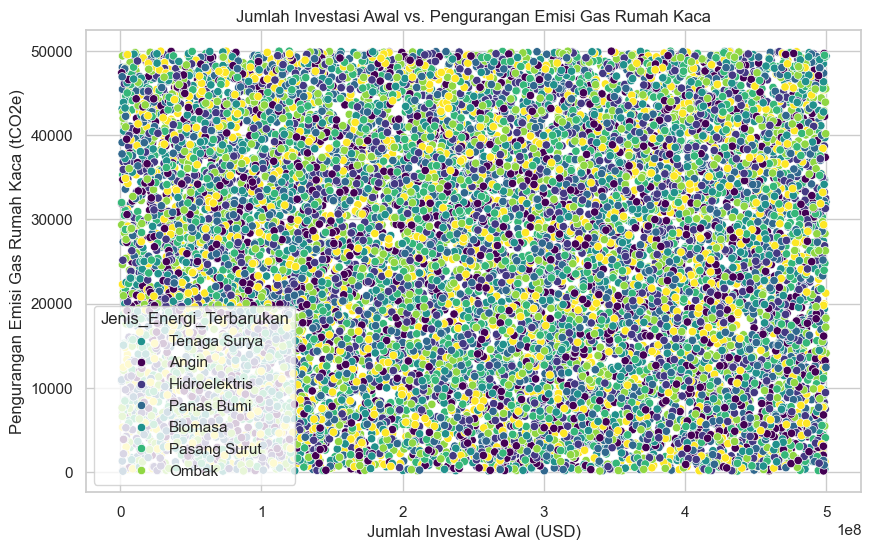

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Jumlah_Investasi_Awal_USD', y='Pengurangan_Emisi_Gas_Rumah_Kaca', hue='Jenis_Energi_Terbarukan', palette='viridis', data=df)
plt.title('Jumlah Investasi Awal vs. Pengurangan Emisi Gas Rumah Kaca')
plt.xlabel('Jumlah Investasi Awal (USD)')
plt.ylabel('Pengurangan Emisi Gas Rumah Kaca (tCO2e)')
plt.legend(title='Jenis_Energi_Terbarukan', labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])
plt.show()


The scatter plot shows a broad distribution of data points, indicating that there is a wide range of initial investment and corresponding greenhouse gas (GHG) emission reductions across the different types of renewable energy. There is no clear pattern or trend that suggests a direct relationship between the amount of initial investment and the reduction in GHG emissions.

## Number of Jobs Created by Different Types of Renewable Energy

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\1424734951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jenis_Energi_Terbarukan', y='Jumlah_Pekerjaan_yang_Diciptakan', data=df, palette='viridis')


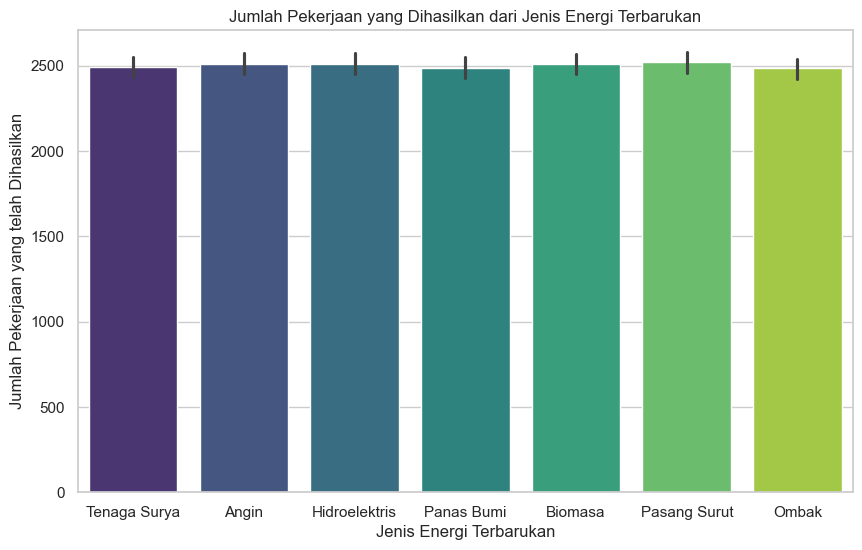

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Jenis_Energi_Terbarukan', y='Jumlah_Pekerjaan_yang_Diciptakan', data=df, palette='viridis')
plt.title('Jumlah Pekerjaan yang Dihasilkan dari Jenis Energi Terbarukan')
plt.xlabel('Jenis Energi Terbarukan')
plt.ylabel('Jumlah Pekerjaan yang telah Dihasilkan')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])
plt.show()


The bar plot indicates that the number of jobs created by different types of renewable energy is relatively similar, with each type creating around 2500 jobs. This suggests that renewable energy projects, regardless of the type, tend to have a similar impact on job creation

# Further Analysis

## 1. Correlation Analysis

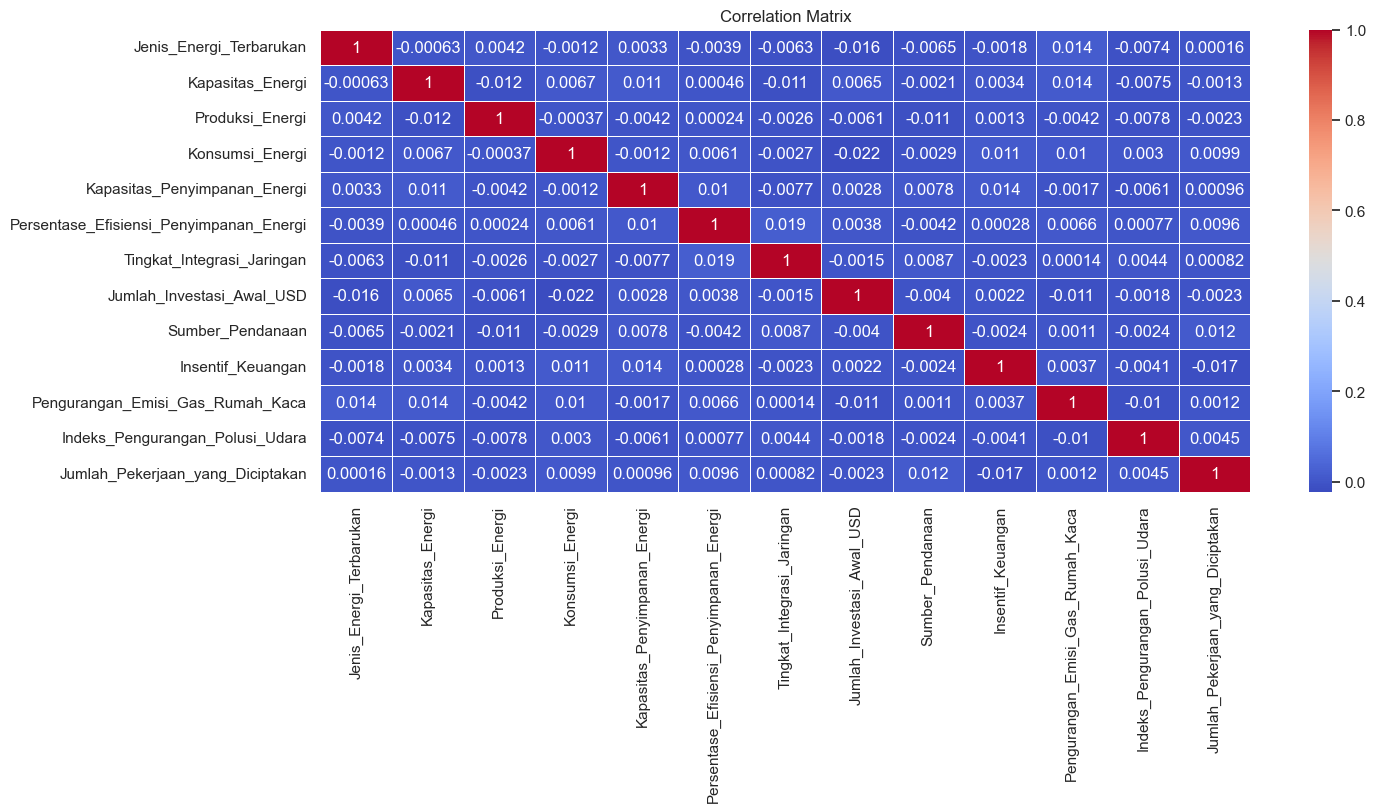

In [30]:
# Menghitung Nilai Matriks Korelasi
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows that most variables have very weak correlations with each other. This indicates that the dataset's features are largely independent.

**Korelasi yang Berkaitan:**
1. Terdapat korelasi positif yang sedikit antara Kapasitas Energi dan Pengurangan Emisi Gas Rumah Kaca
2. Jumlah Investasi Awal memiliki korelasi nilai paling lemah dengan Produksi Energi
3. Insentif Keuangan memiliki nilai korelasi positif paling lemah dengan Pengurangan Gas Rumah Kaca

## 2. Detailed Breakdown by Energy Type

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\1833356381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jenis_Energi_Terbarukan', y='Kapasitas_Energi', data=grouped_df, palette='viridis')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\1833356381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jenis_Energi_Terbarukan', y='Produksi_Energi', data=grouped_df, palette='viridis')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\1833356381.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jenis_

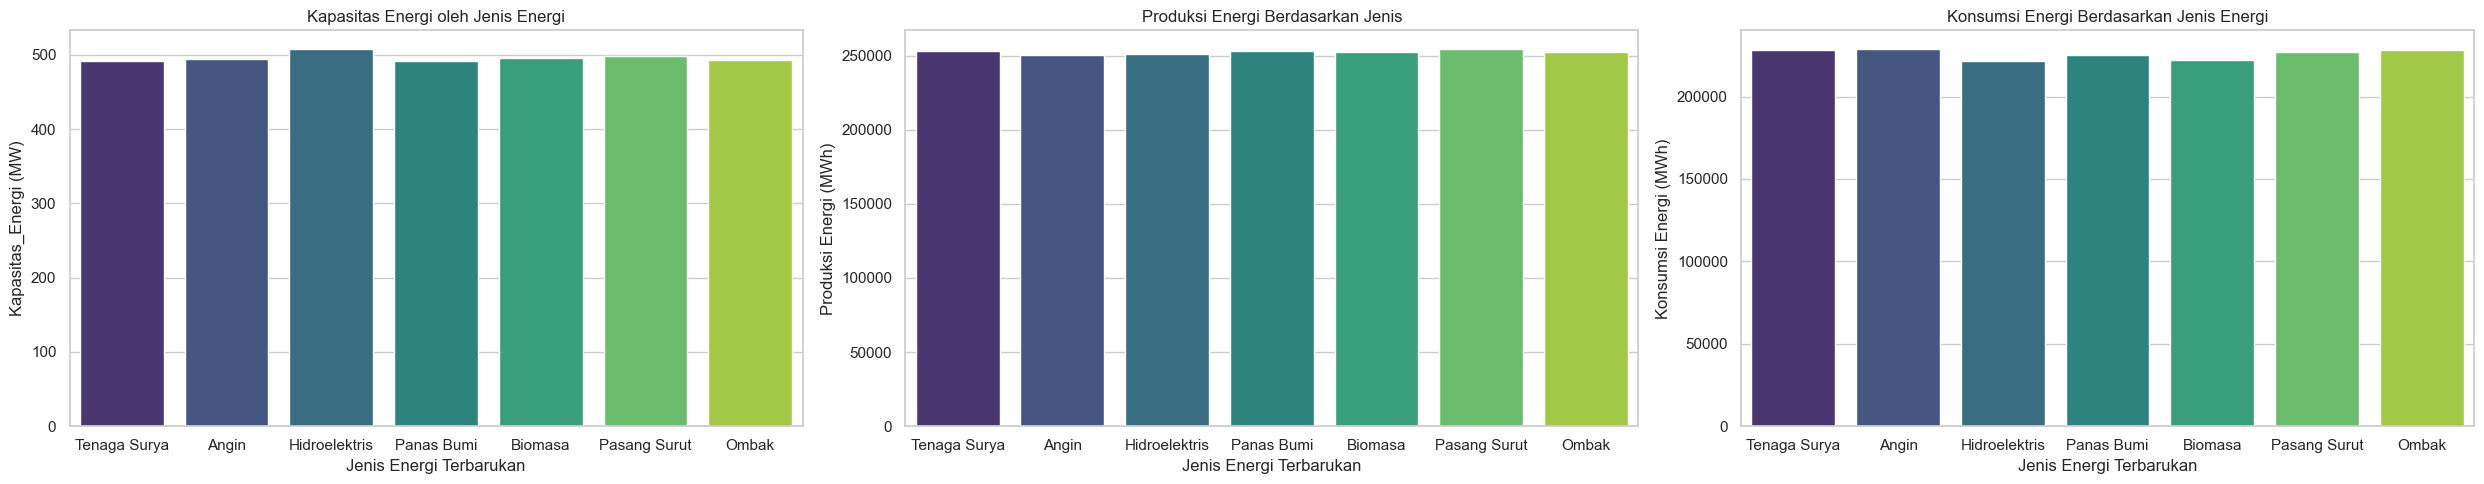

In [27]:
# Group by type of renewable energy and calculate mean values
grouped_df = df.groupby('Jenis_Energi_Terbarukan').mean().reset_index()

# Plot installed capacity, energy production, and energy consumption
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Jenis_Energi_Terbarukan', y='Kapasitas_Energi', data=grouped_df, palette='viridis')
plt.title('Kapasitas Energi oleh Jenis Energi')
plt.xlabel('Jenis Energi Terbarukan')
plt.ylabel('Kapasitas_Energi (MW)')
plt.xticks(ticks=range(7), labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])

plt.subplot(1, 3, 2)
sns.barplot(x='Jenis_Energi_Terbarukan', y='Produksi_Energi', data=grouped_df, palette='viridis')
plt.title('Produksi Energi Berdasarkan Jenis')
plt.xlabel('Jenis Energi Terbarukan')
plt.ylabel('Produksi Energi (MWh)')
plt.xticks(ticks=range(7), labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])

plt.subplot(1, 3, 3)
sns.barplot(x='Jenis_Energi_Terbarukan', y='Konsumsi_Energi', data=grouped_df, palette='viridis')
plt.title('Konsumsi Energi Berdasarkan Jenis Energi')
plt.xlabel('Jenis Energi Terbarukan')
plt.ylabel('Konsumsi Energi (MWh)')
plt.xticks(ticks=range(7), labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])

plt.tight_layout()
plt.show()


The installed capacity, energy production, and energy consumption are relatively consistent across different types of renewable energy. This uniformity suggests a balanced distribution in the dataset.

1. Installed Capacity: Hydroelectric seems to have the highest average installed capacity.
2. Energy Production: All types of renewable energy have similar levels of energy production.
3. Energy Consumption: Similarly, the energy consumption levels are also quite uniform across different renewable energy types.

## 3. Peluang untuk Meningkatkan Persentase Efisiensi Penyimpanan Energi Berdasarkan Jenis Energi Terbarukan

                          count       mean        std        min        25%  \
Jenis_Energi_Terbarukan                                                       
1                        2169.0  75.329295  14.564643  50.012653  62.486403   
2                        2202.0  75.810829  14.563823  50.061001  63.170339   
3                        2157.0  74.686478  14.577657  50.010612  61.998643   
4                        2105.0  74.888360  14.422507  50.003494  62.588320   
5                        2150.0  75.211634  14.242541  50.008205  63.347074   
6                        2124.0  75.437105  14.423435  50.030261  62.954714   
7                        2093.0  75.152016  14.588922  50.038225  62.347335   

                               50%        75%        max  
Jenis_Energi_Terbarukan                                   
1                        75.186329  88.033424  99.994955  
2                        76.236057  88.674014  99.988775  
3                        74.359836  87.632767  99.95

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\1520163578.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Jenis_Energi_Terbarukan', y='Persentase_Efisiensi_Penyimpanan_Energi', data=df, palette='viridis')


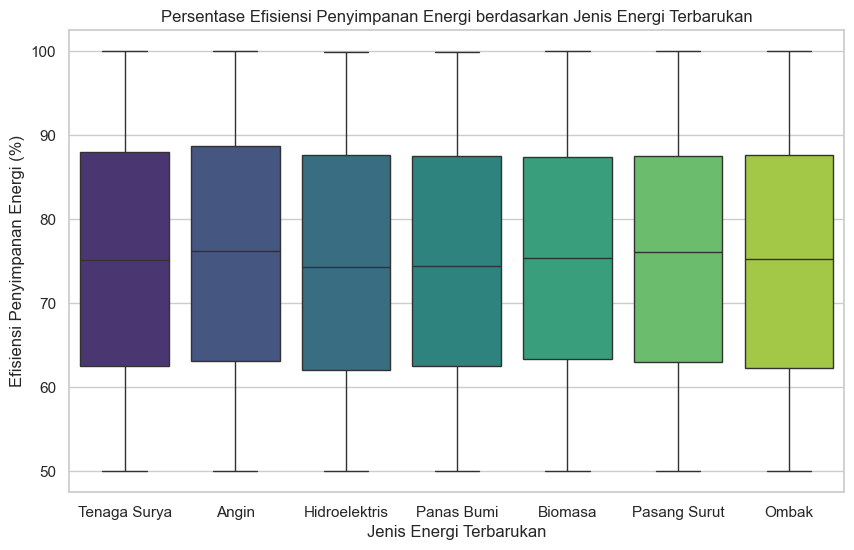

In [28]:
# Group by type of renewable energy and calculate summary statistics for storage efficiency
efficiency_summary = df.groupby('Jenis_Energi_Terbarukan')['Persentase_Efisiensi_Penyimpanan_Energi'].describe()

print(efficiency_summary)

# Plot storage efficiency distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Jenis_Energi_Terbarukan', y='Persentase_Efisiensi_Penyimpanan_Energi', data=df, palette='viridis')
plt.title('Persentase Efisiensi Penyimpanan Energi berdasarkan Jenis Energi Terbarukan')
plt.xlabel('Jenis Energi Terbarukan')
plt.ylabel('Efisiensi Penyimpanan Energi (%)')
plt.xticks(ticks=range(7), labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])
plt.show()


The boxplot shows that storage efficiency percentages for different types of renewable energy sources have a broad range, generally between 60% and 90%.
1. Median Efficiency: All types of renewable energy have a median storage efficiency around 75% to 85%.
2. Variability: Solar and Tidal energy types show slightly more variability in storage efficiency.

## 4. Additional Analysis: Financial Metrics


In [31]:
df.columns

Index(['Jenis_Energi_Terbarukan', 'Kapasitas_Energi', 'Produksi_Energi',
       'Konsumsi_Energi', 'Kapasitas_Penyimpanan_Energi',
       'Persentase_Efisiensi_Penyimpanan_Energi', 'Tingkat_Integrasi_Jaringan',
       'Jumlah_Investasi_Awal_USD', 'Sumber_Pendanaan', 'Insentif_Keuangan',
       'Pengurangan_Emisi_Gas_Rumah_Kaca', 'Indeks_Pengurangan_Polusi_Udara',
       'Jumlah_Pekerjaan_yang_Diciptakan'],
      dtype='object')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\460372440.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jenis_Energi_Terbarukan', y='Jumlah_Investasi_Awal_USD', data=grouped_df, palette='viridis')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\460372440.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jenis_Energi_Terbarukan', y='Insentif_Keuangan', data=grouped_df, palette='viridis')


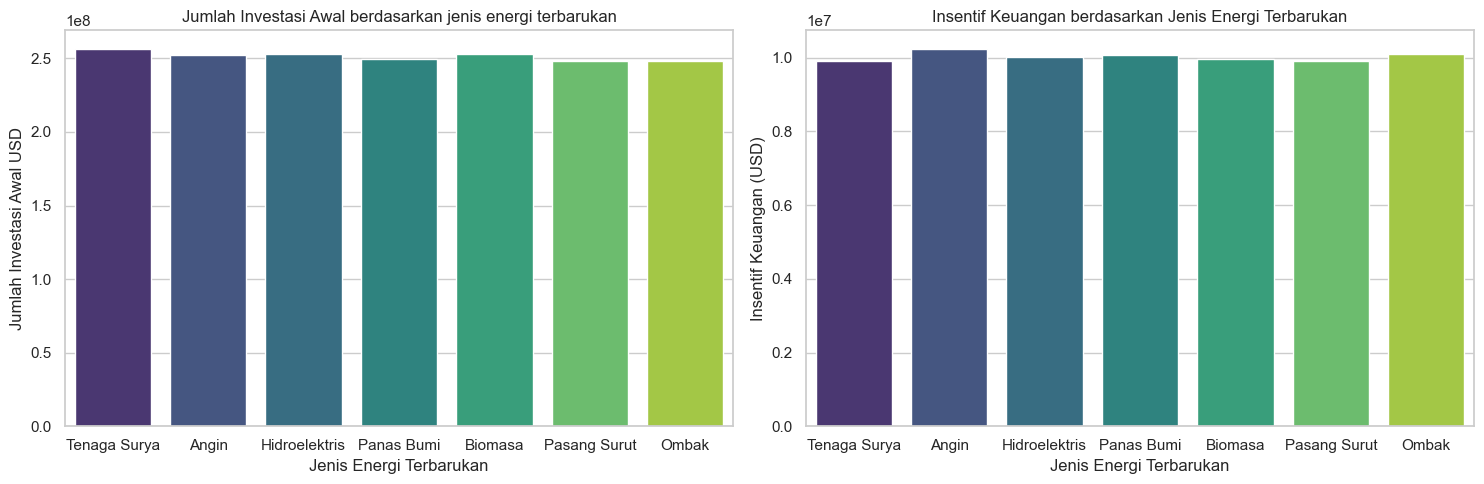

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Jenis_Energi_Terbarukan', y='Jumlah_Investasi_Awal_USD', data=grouped_df, palette='viridis')
plt.title('Jumlah Investasi Awal berdasarkan jenis energi terbarukan')
plt.xlabel('Jenis Energi Terbarukan')
plt.ylabel('Jumlah Investasi Awal USD')
plt.xticks(ticks=range(7), labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])

plt.subplot(1, 2, 2)
sns.barplot(x='Jenis_Energi_Terbarukan', y='Insentif_Keuangan', data=grouped_df, palette='viridis')
plt.title('Insentif Keuangan berdasarkan Jenis Energi Terbarukan')
plt.xlabel('Jenis Energi Terbarukan')
plt.ylabel('Insentif Keuangan (USD)')
plt.xticks(ticks=range(7), labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])

plt.tight_layout()
plt.show()


Initial investment and financial incentives are quite similar across different types of renewable energy.
1. Initial Investment: The investment required for each type of renewable energy does not vary significantly, with all types requiring roughly similar amounts of initial investment.
2. Financial Incentives: The financial incentives are also similar across the board, indicating a uniform approach to incentivizing various types of renewable energy.

## 5. Emission Reduction and Jobs Created

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\1283280946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jenis_Energi_Terbarukan', y='Pengurangan_Emisi_Gas_Rumah_Kaca', data=grouped_df, palette='viridis')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10020\1283280946.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jenis_Energi_Terbarukan', y='Jumlah_Pekerjaan_yang_Diciptakan', data=grouped_df, palette='viridis')


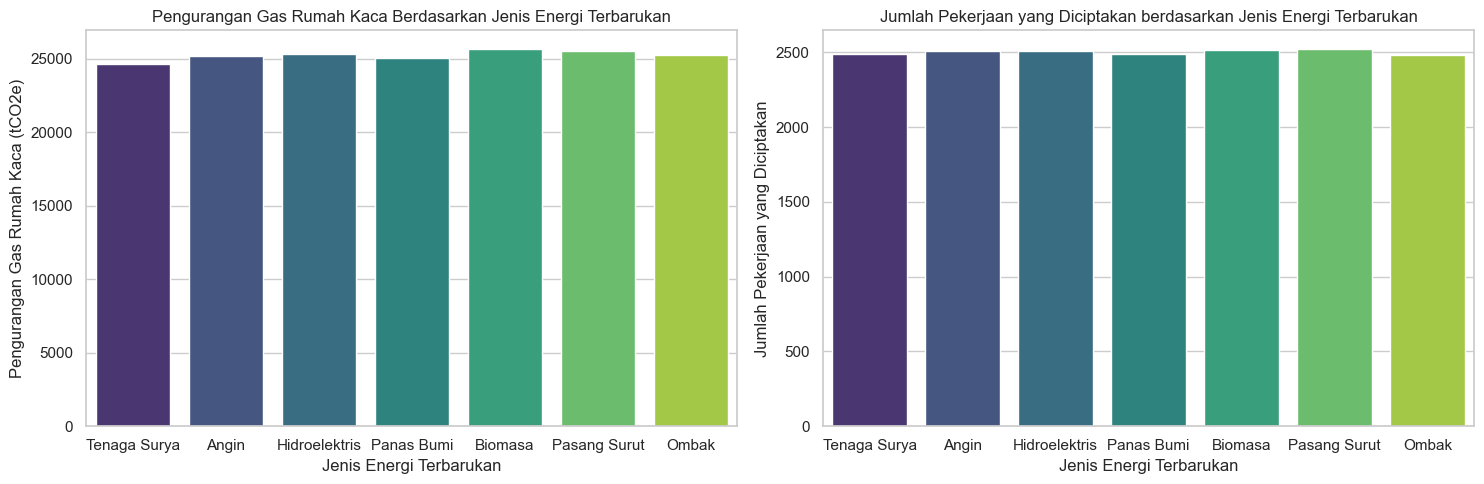

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Jenis_Energi_Terbarukan', y='Pengurangan_Emisi_Gas_Rumah_Kaca', data=grouped_df, palette='viridis')
plt.title('Pengurangan Gas Rumah Kaca Berdasarkan Jenis Energi Terbarukan')
plt.xlabel('Jenis Energi Terbarukan')
plt.ylabel('Pengurangan Gas Rumah Kaca (tCO2e)')
plt.xticks(ticks=range(7), labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])

plt.subplot(1, 2, 2)
sns.barplot(x='Jenis_Energi_Terbarukan', y='Jumlah_Pekerjaan_yang_Diciptakan', data=grouped_df, palette='viridis')
plt.title('Jumlah Pekerjaan yang Diciptakan berdasarkan Jenis Energi Terbarukan')
plt.xlabel('Jenis Energi Terbarukan')
plt.ylabel('Jumlah Pekerjaan yang Diciptakan')
plt.xticks(ticks=range(7), labels = ['Tenaga Surya', 'Angin', 'Hidroelektris', 'Panas Bumi', 'Biomasa', 'Pasang Surut', 'Ombak'])

plt.tight_layout()
plt.show()


Both GHG emission reduction and the number of jobs created are relatively consistent across different types of renewable energy.
1. GHG Emission Reduction: The reduction in greenhouse gas emissions is quite uniform, with each type contributing similarly.
2. Jobs Created: The number of jobs created by each type of renewable energy is also quite similar, suggesting that renewable energy projects generally create comparable employment opportunities regardless of the type.

# Conclusion
The dataset appears to be quite balanced in terms of the installed capacity, energy production, energy consumption, storage efficiency, financial aspects, emission reductions, and job creation across different types of renewable energy. There are no strong correlations between most of the variables, indicating that each feature has a unique contribution to the dataset.

# Machine Learning
